In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


/Users/sanjanathyady/Desktop/project/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
def generate_synthetic_data(num_samples, malicious_ratio=0.5):
    num_malicious = int(num_samples * malicious_ratio)
    num_normal = num_samples - num_malicious

    # Normal logs (e.g., random normal distribution)
    normal_logs = np.random.normal(0, 1, (num_normal, 20))

    # Malicious logs (e.g., random distribution with distinct pattern)
    malicious_logs = np.random.normal(3, 1, (num_malicious, 20))

    return np.concatenate([normal_logs, malicious_logs], axis=0)

In [4]:
data = generate_synthetic_data(1000)
data = (data - np.min(data)) / (np.max(data) - np.min(data))  # Normalize to [0, 1]
BUFFER_SIZE = 1000
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices(data).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


In [5]:

# Define the Generator model
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation="relu", input_shape=(20,)))
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(20, activation="tanh"))
    return model


# Define the Discriminator model
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_shape=(20,)))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation="sigmoid"))
    return model


In [6]:
generator = make_generator_model()
discriminator = make_discriminator_model()

cross_entropy = tf.keras.losses.BinaryCrossentropy()


/Users/sanjanathyady/Desktop/project/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss


In [8]:

# Optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


In [9]:


# Training Step
@tf.function
def train_step(logs):
    noise = tf.random.normal([BATCH_SIZE, 20])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_logs = generator(noise, training=True)

        real_output = discriminator(logs, training=True)
        fake_output = discriminator(generated_logs, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


In [10]:

def train(dataset, epochs):
    for epoch in range(epochs):
        for batch in dataset:
            train_step(batch)
        print(f"Epoch {epoch + 1}/{epochs} completed")

# Train the GAN
EPOCHS = 50
train(train_dataset, EPOCHS)

# Generate and visualize synthetic samples
def generate_synthetic_samples(model, num_samples=16):
    noise = tf.random.normal([num_samples, 20])
    generated_logs = model(noise, training=False)
    return generated_logs
    

2024-11-08 10:18:55.245956: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-11-08 10:18:55.292065: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-11-08 10:18:55.400430: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1/50 completed
Epoch 2/50 completed
Epoch 3/50 completed
Epoch 4/50 completed
Epoch 5/50 completed
Epoch 6/50 completed
Epoch 7/50 completed
Epoch 8/50 completed


2024-11-08 10:18:55.658655: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 9/50 completed
Epoch 10/50 completed
Epoch 11/50 completed
Epoch 12/50 completed
Epoch 13/50 completed
Epoch 14/50 completed
Epoch 15/50 completed


2024-11-08 10:18:56.192344: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 16/50 completed
Epoch 17/50 completed
Epoch 18/50 completed
Epoch 19/50 completed
Epoch 20/50 completed
Epoch 21/50 completed
Epoch 22/50 completed
Epoch 23/50 completed
Epoch 24/50 completed
Epoch 25/50 completed
Epoch 26/50 completed
Epoch 27/50 completed
Epoch 28/50 completed
Epoch 29/50 completed
Epoch 30/50 completed
Epoch 31/50 completed
Epoch 32/50 completed
Epoch 33/50 completed


2024-11-08 10:18:57.278910: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 34/50 completed
Epoch 35/50 completed
Epoch 36/50 completed
Epoch 37/50 completed
Epoch 38/50 completed
Epoch 39/50 completed
Epoch 40/50 completed
Epoch 41/50 completed
Epoch 42/50 completed
Epoch 43/50 completed
Epoch 44/50 completed
Epoch 45/50 completed
Epoch 46/50 completed
Epoch 47/50 completed
Epoch 48/50 completed
Epoch 49/50 completed
Epoch 50/50 completed


In [11]:

# Generate samples after training
generated_samples = generate_synthetic_samples(generator, num_samples=5)
print("Generated synthetic system logs:")
print(generated_samples)


Generated synthetic system logs:
tf.Tensor(
[[0.3224162  0.5213434  0.235065   0.3266033  0.40846312 0.461739
  0.42588893 0.37299448 0.23601027 0.32338554 0.36779317 0.4648808
  0.35508323 0.5197323  0.50312066 0.2666637  0.4419969  0.35572928
  0.5092957  0.3551684 ]
 [0.40948376 0.6519361  0.39743674 0.46134278 0.53054416 0.655108
  0.5465966  0.46716937 0.307567   0.63757515 0.34873894 0.5489998
  0.49650902 0.5764584  0.4122931  0.41416126 0.39178455 0.38765472
  0.58962244 0.4210595 ]
 [0.6077027  0.80051064 0.72317517 0.49104667 0.6319538  0.74686617
  0.7442014  0.64444983 0.6175591  0.5995289  0.6662665  0.7998689
  0.75394756 0.77295285 0.6170922  0.45069304 0.70270973 0.6540614
  0.75992054 0.6145673 ]
 [0.2326051  0.57135195 0.23488228 0.27198443 0.4621282  0.4875439
  0.4156847  0.31930712 0.32477504 0.37336707 0.34887755 0.4752807
  0.43713868 0.49450946 0.4382023  0.2526059  0.47177035 0.36419016
  0.55511534 0.39643946]
 [0.4197669  0.572843   0.37782133 0.3381527  0.51

Attack-gan model from here

In [12]:
import pandas as pd

# Load the dataset
data_path = 'adfa_ld_processed.csv'
data = pd.read_csv(data_path)

# Display the first few rows
print(data.head())

                                            sequence      label
0  ['168', '168', '168', '168', '168', '168', '26...  malicious
1  ['6', '33', '6', '268', '6', '6', '5', '102', ...  malicious
2  ['168', '265', '3', '3', '265', '265', '168', ...  malicious
3  ['311', '240', '240', '6', '6', '6', '6', '6',...     benign
4  ['197', '125', '20', '45', '5', '42', '120', '...     benign


In [27]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler
import re  # To clean and extract integers from the string

# Load your dataset
data_path = 'adfa_ld_processed.csv'
data = pd.read_csv(data_path)

# Cleaning and converting each row to a list of integers
def clean_and_convert(row):
    # Remove any non-numeric characters (like brackets or quotes)
    cleaned_row = re.findall(r'\d+', row[0])
    # Convert to integers
    return list(map(int, cleaned_row))

# Apply the cleaning and conversion function to each row
data_sequences = data.apply(clean_and_convert, axis=1)

# Step 2: Determine a target length (e.g., median length)
sequence_lengths = data_sequences.apply(len)
target_length = int(sequence_lengths.median())

# Step 3: Pad sequences to the target length
padded_sequences = pad_sequences(data_sequences, maxlen=target_length, padding='post', truncating='post', dtype='float32')

# Step 4: Normalize the padded sequences
scaler = MinMaxScaler()
padded_sequences_normalized = scaler.fit_transform(padded_sequences.reshape(-1, target_length))

# Reshape back to original format if needed
padded_sequences_normalized = padded_sequences_normalized.reshape(-1, target_length)

# Now `padded_sequences_normalized` is ready for use in the GAN


/var/folders/b3/2cyr9kb15bx6073klxmmzym00000gn/T/ipykernel_23730/2247111671.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cleaned_row = re.findall(r'\d+', row[0])


In [28]:
padded_sequences_normalized

array([[0.5357143 , 0.5030488 , 0.48961425, ..., 0.49411765, 0.7794118 ,
        0.5436893 ],
       [0.00974026, 0.09146341, 0.00890208, ..., 0.        , 0.        ,
        0.        ],
       [0.5357143 , 0.79878044, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00974026, 0.6646341 , 0.64688426, ..., 0.        , 0.        ,
        0.        ],
       [0.28571427, 0.5762195 , 0.00890208, ..., 0.        , 0.        ,
        0.        ],
       [0.7694805 , 0.72256094, 0.08902077, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [29]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Set some parameters
INPUT_SHAPE = padded_sequences_normalized.shape[1]  # Assuming fixed length after padding
LATENT_DIM = 100  # Dimension of the random noise vector input to the generator

# Define the Generator Model



In [30]:
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation="relu", input_shape=(LATENT_DIM,)))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(INPUT_SHAPE, activation="tanh"))  # Output shape matches log sequence length
    return model


# Define the Discriminator Model
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_shape=(INPUT_SHAPE,)))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation="sigmoid"))  # Binary classification: benign (0) or malicious (1)
    return model

In [31]:

# Instantiate the generator and discriminator
generator = build_generator()
discriminator = build_discriminator()

# Define Loss Functions
cross_entropy = tf.keras.losses.BinaryCrossentropy()


/Users/sanjanathyady/Desktop/project/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/sanjanathyady/Desktop/project/.venv/lib/python3.9/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [32]:


def generator_loss(fake_output):
    # Goal: Fool the discriminator into classifying fake logs as malicious
    return cross_entropy(tf.ones_like(fake_output), fake_output)  # '1' for malicious

def discriminator_loss(real_output, fake_output):
    # Discriminator wants to correctly classify benign logs as 0 and malicious logs as 1
    real_loss = cross_entropy(tf.zeros_like(real_output), real_output)  # '0' for benign
    fake_loss = cross_entropy(tf.ones_like(fake_output), fake_output)  # '1' for malicious
    return real_loss + fake_loss

# Define Optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(5e-5)  # Lower the learning rate



# Training Step



In [33]:

@tf.function
def train_step(real_logs):
    noise = tf.random.normal([BATCH_SIZE, LATENT_DIM])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_logs = generator(noise, training=True)
        
        real_output = discriminator(real_logs, training=True)
        fake_output = discriminator(generated_logs, training=True)
        
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
    
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss

# Training Loop
def train_gan(dataset, epochs):
    generator_losses = []
    discriminator_losses = []

    for epoch in range(epochs):
        gen_loss_epoch = 0.0
        disc_loss_epoch = 0.0
        batch_count = 0
        
        for batch in dataset:
            gen_loss, disc_loss = train_step(batch)
            gen_loss_epoch += gen_loss
            disc_loss_epoch += disc_loss
            batch_count += 1
        
        # Calculate average loss for the epoch
        generator_losses.append(gen_loss_epoch / batch_count)
        discriminator_losses.append(disc_loss_epoch / batch_count)
        
        print(f"Epoch {epoch+1}/{epochs} - Generator Loss: {gen_loss_epoch / batch_count:.4f}, Discriminator Loss: {disc_loss_epoch / batch_count:.4f}")

    # Plotting the losses
    plt.figure(figsize=(10, 5))
    plt.plot(generator_losses, label="Generator Loss")
    plt.plot(discriminator_losses, label="Discriminator Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Generator and Discriminator Loss Over Epochs")
    plt.legend()
    plt.show()


In [34]:

# Prepare Dataset
BATCH_SIZE = 32
EPOCHS = 50

# Convert normalized sequences to TensorFlow dataset and batch them
malicious_dataset = tf.data.Dataset.from_tensor_slices(padded_sequences_normalized).shuffle(len(padded_sequences_normalized)).batch(BATCH_SIZE)


Epoch 1/50 - Generator Loss: 0.2282, Discriminator Loss: 0.6239
Epoch 2/50 - Generator Loss: 0.0188, Discriminator Loss: 0.1720
Epoch 3/50 - Generator Loss: 0.0066, Discriminator Loss: 0.0900
Epoch 4/50 - Generator Loss: 0.0033, Discriminator Loss: 0.0589
Epoch 5/50 - Generator Loss: 0.0020, Discriminator Loss: 0.0425
Epoch 6/50 - Generator Loss: 0.0014, Discriminator Loss: 0.0335
Epoch 7/50 - Generator Loss: 0.0010, Discriminator Loss: 0.0280
Epoch 8/50 - Generator Loss: 0.0007, Discriminator Loss: 0.0236
Epoch 9/50 - Generator Loss: 0.0006, Discriminator Loss: 0.0212
Epoch 10/50 - Generator Loss: 0.0004, Discriminator Loss: 0.0182
Epoch 11/50 - Generator Loss: 0.0004, Discriminator Loss: 0.0163
Epoch 12/50 - Generator Loss: 0.0003, Discriminator Loss: 0.0148
Epoch 13/50 - Generator Loss: 0.0002, Discriminator Loss: 0.0141
Epoch 14/50 - Generator Loss: 0.0002, Discriminator Loss: 0.0130
Epoch 15/50 - Generator Loss: 0.0002, Discriminator Loss: 0.0120
Epoch 16/50 - Generator Loss: 0.00

2024-11-08 10:21:42.195732: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 28/50 - Generator Loss: 0.0000, Discriminator Loss: 0.0062
Epoch 29/50 - Generator Loss: 0.0000, Discriminator Loss: 0.0058
Epoch 30/50 - Generator Loss: 0.0000, Discriminator Loss: 0.0056
Epoch 31/50 - Generator Loss: 0.0000, Discriminator Loss: 0.0052
Epoch 32/50 - Generator Loss: 0.0000, Discriminator Loss: 0.0053
Epoch 33/50 - Generator Loss: 0.0000, Discriminator Loss: 0.0049
Epoch 34/50 - Generator Loss: 0.0000, Discriminator Loss: 0.0050
Epoch 35/50 - Generator Loss: 0.0000, Discriminator Loss: 0.0045
Epoch 36/50 - Generator Loss: 0.0000, Discriminator Loss: 0.0042
Epoch 37/50 - Generator Loss: 0.0000, Discriminator Loss: 0.0038
Epoch 38/50 - Generator Loss: 0.0000, Discriminator Loss: 0.0039
Epoch 39/50 - Generator Loss: 0.0000, Discriminator Loss: 0.0038
Epoch 40/50 - Generator Loss: 0.0000, Discriminator Loss: 0.0035
Epoch 41/50 - Generator Loss: 0.0000, Discriminator Loss: 0.0033
Epoch 42/50 - Generator Loss: 0.0000, Discriminator Loss: 0.0032
Epoch 43/50 - Generator L

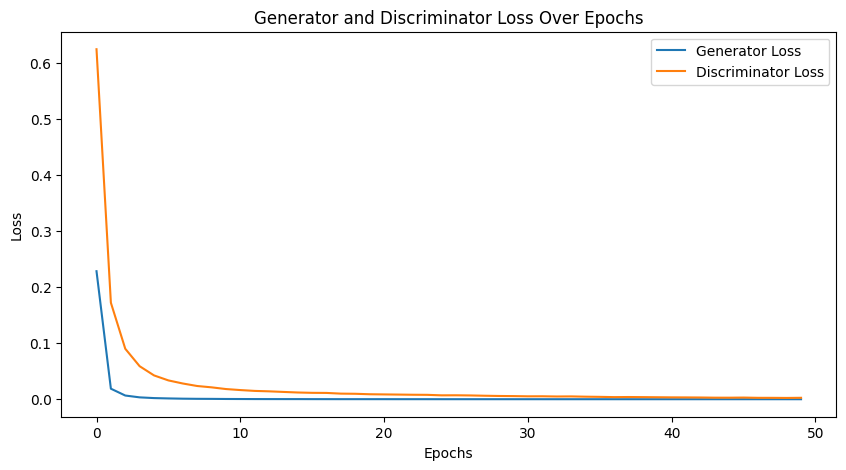

In [35]:

# Train the GAN
train_gan(malicious_dataset, EPOCHS)

In [36]:

# Generate and display synthetic malicious samples
def generate_synthetic_logs(model, num_samples=5):
    noise = tf.random.normal([num_samples, LATENT_DIM])
    generated_logs = model(noise, training=False)
    return generated_logs


In [39]:

# Display a few generated samples
generated_samples = generate_synthetic_logs(generator, num_samples=5)
print("Generated synthetic malicious logs:")
print(generated_samples)


Generated synthetic malicious logs:
tf.Tensor(
[[-0.9139534   0.9169651  -0.54012746 ... -0.7829064   0.6967921
   0.06413009]
 [-0.46344137  0.8475406  -0.7666232  ... -0.8594527   0.27555704
   0.19389987]
 [-0.7231584   0.72466826 -0.5602551  ... -0.7690965   0.6210189
   0.0547808 ]
 [-0.6252184   0.81358796 -0.39786765 ... -0.66503036  0.62949437
  -0.27921933]
 [-0.66082126  0.88432515 -0.4751598  ... -0.7783639   0.12432697
   0.06970598]], shape=(5, 229), dtype=float32)


In [40]:
@tf.function
def compute_discriminator_accuracy(real_logs, fake_logs):
    # Get predictions for real and fake logs
    real_predictions = discriminator(real_logs, training=False)
    fake_predictions = discriminator(fake_logs, training=False)
    
    # Threshold to classify: values > 0.5 are "real," values <= 0.5 are "fake"
    real_accuracy = tf.reduce_mean(tf.cast(real_predictions > 0.5, tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(fake_predictions <= 0.5, tf.float32))
    
    # Total accuracy is the mean of both real and fake accuracies
    discriminator_accuracy = (real_accuracy + fake_accuracy) / 2
    return discriminator_accuracy

# Example usage within training:
real_logs_sample = next(iter(malicious_dataset))  # Get a batch of real logs
noise_sample = tf.random.normal([BATCH_SIZE, LATENT_DIM])  # Generate noise
fake_logs_sample = generator(noise_sample, training=False)  # Generate fake logs
disc_accuracy = compute_discriminator_accuracy(real_logs_sample, fake_logs_sample)
print("Discriminator Accuracy on Real vs Fake Logs:", disc_accuracy.numpy())


Discriminator Accuracy on Real vs Fake Logs: 0.0


In [41]:
@tf.function
def compute_generator_success_rate(fake_logs):
    # Generate fake logs and get predictions from the discriminator
    predictions = discriminator(fake_logs, training=False)
    # Success rate: how often the fake logs are classified as "real" by the discriminator
    success_rate = tf.reduce_mean(tf.cast(predictions > 0.5, tf.float32))
    return success_rate

# Example usage:
fake_logs_sample = generator(noise_sample, training=False)  # Generate fake logs
gen_success_rate = compute_generator_success_rate(fake_logs_sample)
print("Generator's Success Rate (Fooling Rate):", gen_success_rate.numpy())


Generator's Success Rate (Fooling Rate): 1.0


In [42]:

generated_df = pd.DataFrame(generated_samples.numpy() if hasattr(generated_samples, 'numpy') else generated_samples)

# Save to CSV
output_path = 'generated_data.csv'  # Change this path as needed
generated_df.to_csv(output_path, index=False)

print(f"Generated data saved to {output_path}")


Generated data saved to generated_data.csv


In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming `scaler` is the MinMaxScaler instance used for normalization
# and `padded_sequences_normalized` is the normalized data.

# Denormalizing function
def denormalize_data_to_integers(normalized_data, scaler, target_length):
    """
    Denormalizes the normalized data using the scaler and converts to integers.
    
    Parameters:
    - normalized_data: np.array, normalized data that needs to be denormalized
    - scaler: MinMaxScaler instance, the scaler used to normalize the original data
    - target_length: int, length to reshape the denormalized data if necessary
    
    Returns:
    - denormalized_data: np.array, data in original scale as integers
    """
    # Flatten the normalized data, denormalize it, and reshape back
    denormalized_data = scaler.inverse_transform(normalized_data.reshape(-1, target_length))
    # Convert to integers
    denormalized_data = denormalized_data.round().astype(int)
    return denormalized_data

# Use the function to denormalize the data
denormalized_data = denormalize_data_to_integers(padded_sequences_normalized, scaler, target_length)

# Optionally, convert to DataFrame for easier viewing or saving
denormalized_df = pd.DataFrame(denormalized_data)

# Save the denormalized data to a CSV file
output_path = 'denormalized_data_integers.csv'  # Path to save the CSV file
denormalized_df.to_csv(output_path, index=False)
print(f"Denormalized integer data saved to {output_path}")


Denormalized integer data saved to denormalized_data_integers.csv


loading the discriminator__ model___